<a href="https://colab.research.google.com/github/JotaBlanco/TheValley/blob/main/Notebooks/02-analisis-exploratorio-visual/EJERCICIO_4___EDA_Visual_Barsa_Madrid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# INTRO: Análisis Exploratorio Visual
Ejercicio para afianzar los conceptos básicos de EDA (Exploratory Data Analysis) Visual utilizando datos sobre la evolución del Covid.

Notebook por [Javier Blanco Cordero](https://www.linkedin.com/in/javier-blanco-cordero-71373656/).

### Enlaces de interés
*   [Slides de presentación](https://docs.google.com/presentation/d/1N7MPSC7ntM-0ZEHlrN5xRTpT4uNDyU_o53GBvnojUx8/edit?usp=sharing)
*   [Enlace a al notebook de Colab de la clase 2](https://colab.research.google.com/github/JotaBlanco/TheValley/blob/main/Notebooks/02-analisis-exploratorio-visual/02___Analisis_exploratorio_visual.ipynb)
*   [Enlace a este notebook de Colab](https://colab.research.google.com/github/JotaBlanco/TheValley/blob/main/Notebooks/02-analisis-exploratorio-visual/EJERCICIO_4___EDA_Visual_Barsa_Madrid.ipynb)



# 01 Import
Importamos todas las librerías necesarias para este análisis ([¿No sabes lo que es una librería de Python?](https://www.quora.com/What-is-a-Python-library-and-what-can-I-use-it-for)).

Necesitaremos pandas, numpy, matplotlib.pyplot y seaborn.

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 02 Importa dataframe Fifa19
En la clase 1 limpiamos el dataframe con datos de los jugadores del fifa y lo guardamos en nuestros drive ([aquí](https://drive.google.com/file/d/1P0sQHp1bPiKbL-MSr7FndJRgowvOLdjU/view?usp=sharing) puedes encontrar mi copia). Importa este dataset ya limpiado en un dataframe llamado **df_fifa19**.

No necesitaremos todas las variables. Haz que el dataframe contenga solo estas variables y en este orden:

cols = ['Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club', 'Height_cm', 'Weight_kg', 'Value_€', 'Wage_€', 'Release Clause_€', 'Special', 'Preferred Foot', 'International Reputation', 'Weak Foot', 'Position', 'Jersey Number', 'Joined', 'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes']

In [21]:
# Primero emparejamos Colab con Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [22]:
# Importamos el archivos usando read_csv()
dir_archivo = '/content/drive/My Drive/Data/Clases/Fifa19_Clean.csv'
df_fifa19 = pd.read_csv(dir_archivo)
df_fifa19.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,Weight_kg,Value_€,Wage_€,Release Clause_€,Height_cm
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M,72.121128,110500000.0,565000.0,226500000.0,170.18
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M,83.007336,77000000.0,405000.0,127100000.0,187.96
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M,68.038800,118500000.0,290000.0,228100000.0,175.26
3,De Gea,27,Spain,91,93,Manchester United,€72M,€260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M,76.203456,72000000.0,260000.0,138600000.0,193.04
4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M,69.853168,102000000.0,355000.0,196400000.0,180.34


In [23]:
cols = ['Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club',
        'Height_cm', 'Weight_kg', 'Value_€', 'Wage_€', 'Release Clause_€',  
        'Special', 'Preferred Foot', 'International Reputation',
        'Weak Foot', 'Position', 'Jersey Number', 'Joined',
        'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 
        'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 
        'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance', 
        'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
        'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
        'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
        'GKKicking', 'GKPositioning', 'GKReflexes'
        ]

In [24]:
df_fifa19 = df_fifa19[cols]
df_fifa19.head()

,Name,Age,Nationality,Overall,Potential,Club,Height_cm,Weight_kg,Value_€,Wage_€,Release Clause_€,Special,Preferred Foot,International Reputation,Weak Foot,Position,Jersey Number,Joined,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,L. Messi,31,Argentina,94,94,FC Barcelona,170.18,72.121128,110500000.0,565000.0,226500000.0,2202,Left,5.0,4.0,RF,10.0,"Jul 1, 2004",84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,187.96,83.007336,77000000.0,405000.0,127100000.0,2228,Right,5.0,4.0,ST,7.0,"Jul 10, 2018",84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,175.26,68.038800,118500000.0,290000.0,228100000.0,2143,Right,5.0,5.0,LW,10.0,"Aug 3, 2017",79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,De Gea,27,Spain,91,93,Manchester United,193.04,76.203456,72000000.0,260000.0,138600000.0,1471,Right,4.0,3.0,GK,1.0,"Jul 1, 2011",17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
4,K. De Bruyne,27,Belgium,91,92,Manchester City,180.34,69.853168,102000000.0,355000.0,196400000.0,2281,Right,4.0,5.0,RCM,7.0,"Aug 30, 2015",93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0


# 03 Crea dataframes para Barsa y Madrid
A partir de df_fifa19 crea un df_madrid y un df_barsa con los jugadores correspondientes a cada equipo.

In [28]:
# Lista de equipos total
lista_equipos = df_fifa19['Club'].unique()

# Cómo está escrito el Madrid en este dataset?
display([equipo for equipo in lista_equipos if 'Madrid' in equipo])

# Cómo está escrito el Barsa en este dataset?
display([equipo for equipo in lista_equipos if 'Bar' in equipo])

['Real Madrid', 'Atlético Madrid']

['FC Barcelona', 'Barnsley']

In [30]:
# df_Madrid
filtro_madrid = df_fifa19['Club'] == 'Real Madrid'
df_madrid = df_fifa19[filtro_madrid]
df_madrid.head(3)

,Name,Age,Nationality,Overall,Potential,Club,Height_cm,Weight_kg,Value_€,Wage_€,Release Clause_€,Special,Preferred Foot,International Reputation,Weak Foot,Position,Jersey Number,Joined,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
6,L. Modrić,32,Croatia,91,91,Real Madrid,172.72,66.224432,67000000.0,420000.0,137400000.0,2280,Right,4.0,4.0,RCM,10.0,"Aug 1, 2012",86.0,72.0,55.0,93.0,76.0,90.0,85.0,78.0,88.0,93.0,80.0,72.0,93.0,90.0,94.0,79.0,68.0,89.0,58.0,82.0,62.0,83.0,79.0,92.0,82.0,84.0,60.0,76.0,73.0,13.0,9.0,7.0,14.0,9.0
8,Sergio Ramos,32,Spain,91,91,Real Madrid,182.88,82.100152,51000000.0,380000.0,104600000.0,2201,Right,4.0,3.0,RCB,15.0,"Aug 1, 2005",66.0,60.0,91.0,78.0,66.0,63.0,74.0,72.0,77.0,84.0,76.0,75.0,78.0,85.0,66.0,79.0,93.0,84.0,83.0,59.0,88.0,90.0,60.0,63.0,75.0,82.0,87.0,92.0,91.0,11.0,8.0,9.0,7.0,11.0
11,T. Kroos,28,Germany,90,90,Real Madrid,182.88,76.203456,76500000.0,355000.0,156800000.0,2190,Right,4.0,5.0,LCM,8.0,"Jul 17, 2014",88.0,76.0,54.0,92.0,82.0,81.0,86.0,84.0,93.0,90.0,64.0,62.0,70.0,89.0,71.0,87.0,30.0,75.0,73.0,92.0,60.0,82.0,79.0,86.0,73.0,85.0,72.0,79.0,69.0,10.0,11.0,13.0,7.0,10.0


In [31]:
# df_Barsa
filtro_barsa = df_fifa19['Club'] == 'FC Barcelona'
df_barsa = df_fifa19[filtro_barsa]
df_barsa.head(3)

,Name,Age,Nationality,Overall,Potential,Club,Height_cm,Weight_kg,Value_€,Wage_€,Release Clause_€,Special,Preferred Foot,International Reputation,Weak Foot,Position,Jersey Number,Joined,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,L. Messi,31,Argentina,94,94,FC Barcelona,170.18,72.121128,110500000.0,565000.0,226500000.0,2202,Left,5.0,4.0,RF,10.0,"Jul 1, 2004",84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
7,L. Suárez,31,Uruguay,91,91,FC Barcelona,182.88,86.182480,80000000.0,455000.0,164000000.0,2346,Right,5.0,4.0,RS,9.0,"Jul 11, 2014",77.0,93.0,77.0,82.0,88.0,87.0,86.0,84.0,64.0,90.0,86.0,75.0,82.0,92.0,83.0,86.0,69.0,90.0,83.0,85.0,87.0,41.0,92.0,84.0,85.0,85.0,62.0,45.0,38.0,27.0,25.0,31.0,33.0,37.0
18,M. ter Stegen,26,Germany,89,92,FC Barcelona,187.96,84.821704,58000000.0,240000.0,123300000.0,1328,Right,3.0,4.0,GK,22.0,"Jul 1, 2014",15.0,14.0,11.0,36.0,14.0,17.0,18.0,12.0,42.0,18.0,38.0,50.0,37.0,85.0,43.0,22.0,79.0,35.0,79.0,10.0,43.0,22.0,11.0,69.0,25.0,69.0,25.0,13.0,10.0,87.0,85.0,88.0,85.0,90.0


# 04 Qué equipo es mejor?
Cuidado, guardad vuestra cerveza y utilizad la ciencia de datos. 

## 0401 .describe()
Con el método .describe(), comprueba la distribución de la variable numérica overall.

In [34]:
df_madrid['Overall'].describe()

count    33.000000
mean     78.242424
std       9.902747
min      62.000000
25%      67.000000
50%      80.000000
75%      87.000000
max      91.000000
Name: Overall, dtype: float64

In [35]:
df_barsa['Overall'].describe()

count    33.000000
mean     78.030303
std       9.583465
min      61.000000
25%      69.000000
50%      82.000000
75%      87.000000
max      94.000000
Name: Overall, dtype: float64

## 0403 .hist()
Utiliza histogramas para comparar la variable Overall en una imagen con dos gráficos (dos en una misma columna).

Utiliza como bins de 60 a 95 con intervalos de 2.5 en 2.5 (60, 62.5, 65, 67.5, etc.) 


In [65]:
sns.set()

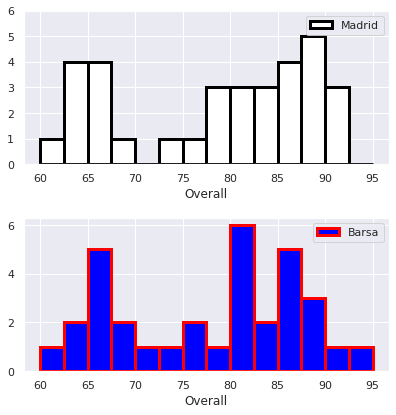

In [66]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1)
fig.tight_layout(pad=1)
fig.set_size_inches(6,6)

bins = [60, 62.5, 65, 67.5, 70, 72.5, 75, 77.5, 80, 82.5, 85, 87.5, 90, 92.5, 95]

# Tasa de mortalidad
ax1.hist(df_madrid['Overall'], 
         bins = bins, 
         label='Madrid', 
         edgecolor = 'black', 
         linewidth = 3,
         color='white')
ax1.set(xlabel = 'Overall')
ax1.set_ylim(top=6)
ax1.legend()

# Tasa de mortalidad
ax2.hist(df_barsa['Overall'], 
         bins = bins,
         label='Barsa', 
         linewidth = 3, 
         edgecolor = 'red', 
         color='blue')
ax2.set(xlabel = 'Overall')
ax2.legend()
plt.show()

# 05 Qué equipo tiene mejores jugadores españoles/extranjeros?
Vamos a utilizar para esta comparación una gráfica específica de seaborn: sns.[catplot()](https://seaborn.pydata.org/examples/grouped_barplot.html).

## 0501 Genera variable nacionalidad
Genera una variable binaria que identifique a un jugador como "Español" o "Extranjero".

In [76]:
filtro_español = df_madrid['Nationality'] == 'Spain'
filtro_extranjero = df_madrid['Nationality'] != 'Spain'

df_madrid.loc[filtro_español, 'Nacionalidad'] = 'Español'
df_madrid.loc[filtro_extranjero, 'Nacionalidad'] = 'Extranjero'

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [79]:
filtro_español = df_barsa['Nationality'] == 'Spain'
filtro_extranjero = df_barsa['Nationality'] != 'Spain'

df_barsa.loc[filtro_español, 'Nacionalidad'] = 'Español'
df_barsa.loc[filtro_extranjero, 'Nacionalidad'] = 'Extranjero'

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


## 0502 Utiliza sns.catplot()
sns.[catplot](https://seaborn.pydata.org/examples/grouped_barplot.html) permite comparar 3 conceptos en una sola gráfica. 

Échale un vistazo a la documentación e intenta utilizarlo aquí.

En definitiva, trata de crear esta imagen.

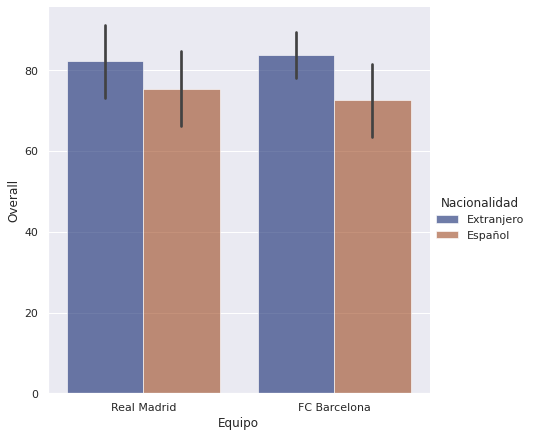

In [86]:
g = sns.catplot(
    data=df_madrid.append(df_barsa), 
    kind="bar",
    x="Club", 
    y="Overall", 
    hue="Nacionalidad",
    ci="sd", 
    palette="dark", 
    alpha=.6, 
    height=6
)
g.set_axis_labels("Equipo", "Overall")
plt.show()

# 06 Compara alineaciones de rápidos
A veces en el Fifa lo (casi) único importante es la velocidad. Si tú, como gamer, sigues este único criterio, qué equipo prefirirías?

Escoge los 10 jugadores de campo (exluye los porteros) más rápidos de cada equipo y decide.

In [89]:
for df_i in [df_madrid, df_barsa]:
  # Definimos el filtro de jugador de campo
  filtro_no_portero = df_i['Position'] != 'GK'

  # Nos quedamos solo con los jugadores de campo y con las columnas nombre y velocidad
  df_i = df_i.loc[filtro_no_portero, ['Name', 'SprintSpeed']]
  
  # Ordenamos el dataframe por la variable de velocidad
  df_i.sort_values('SprintSpeed', ascending=False, inplace=True)

  # Nos quedamos con los 10 más rápidos
  df_i = df_i.iloc[:10,:]

  display(df_i)
  display(df_i.describe())

,Name,SprintSpeed
36,G. Bale,95.0
1143,Vinícius Júnior,94.0
62,R. Varane,85.0
430,Mariano,85.0
123,Carvajal,84.0
417,Odriozola,82.0
35,Marcelo,82.0
79,Marco Asensio,82.0
11327,Fran García,79.0
11163,Sergio López,79.0


,SprintSpeed
count,10.000000
mean,84.700000
std,5.578729
min,79.000000
25%,82.000000
50%,83.000000
75%,85.000000
max,95.000000


,Name,SprintSpeed
49,Jordi Alba,93.0
324,Nélson Semedo,92.0
155,O. Dembélé,92.0
0,L. Messi,86.0
236,Malcom,82.0
1007,Munir,80.0
6000,M. Wagué,79.0
192,Sergi Roberto,79.0
613,Denis Suárez,77.0
3684,Aleñá,76.0


,SprintSpeed
count,10.000000
mean,83.600000
std,6.619836
min,76.000000
25%,79.000000
50%,81.000000
75%,90.500000
max,93.000000
